In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [19]:
Min, Max, N = 0.,40.,101
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [20]:
def h1(y):
    return 100.
def h2(y):
    return 0.
def h3(x):
    return 0.
def h4(x):
    return 0.

In [21]:
def InitT():
    T = np.zeros((N,N))
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    return T

In [22]:
def GetRelaxation(T, omega, Nit = int(1e5), tolerancia = 1e-2):
    itmax = 0
    for it in tqdm(range(Nit)):
        dmax = 0.
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
        if np.abs(dmax) < tolerancia:
            itmax = it
            break
    return T,itmax

In [29]:
omega= np.linspace(1.0,1.9,15)
It=[]
for w in omega:
    T = InitT()
    Tf1,it =  GetRelaxation(T,w)
    It.append(it)

  0%|          | 201/100000 [00:14<2:00:42, 13.78it/s]


<IPython.core.display.Javascript object>


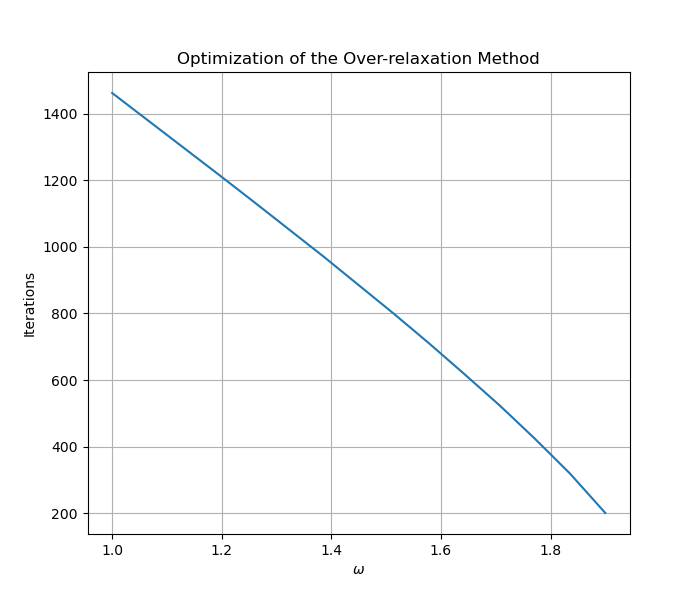

Text(0, 0.5, 'Iterations')

In [30]:
fig= plt.figure(figsize=(7,6))
plt.plot(omega, It)
plt.grid()
plt.title("Optimization of the Over-relaxation Method")
plt.xlabel("$\omega$")
plt.ylabel("Iterations")